# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [3]:
#Reading the Data
df = pd.read_csv('abtest.csv').copy()
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# Viewing the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Viewing the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Checking the shape of the dataset
df.shape

(100, 6)

* Sample size is 100, then the dataset has 6 columns.

In [7]:
# Getting the statistical summary for the variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* The mean of the time spent is around 5.378. The maximum time spent is 10.71 and the mininum time spent is  0.19.
* The standard deviation of time spent is 2.378.

In [8]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There is no missing value in the data.

In [9]:
# Check for duplicates
df[df.duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


* There is no duplicated values.

### Univariate Analysis

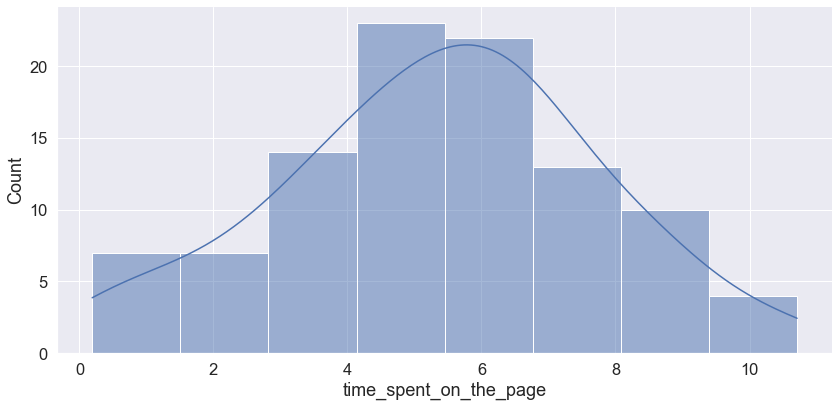

In [10]:
# plot a density curve of the distribution of the time spent on the page
sns.set(font_scale = 1.5)
sns.displot(df['time_spent_on_the_page'], kde=True, height =6, aspect = 2);

* The graph has bell shape. The data looks like normal distributed.

### Bivariate Analysis

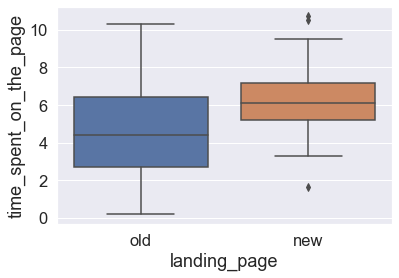

In [11]:
# The boxplot shows the graph of old and new landing_page
sns.boxplot(x = 'landing_page', y ='time_spent_on_the_page', data = df);

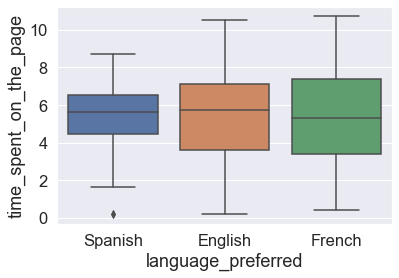

In [12]:
#Plot the graph of the time spent on the page categorized by language_preferred
sns.boxplot(x = 'language_preferred', y ='time_spent_on_the_page', data = df);

* The Spanish language has a narrower range of time spent compared to the other two lanaguages.

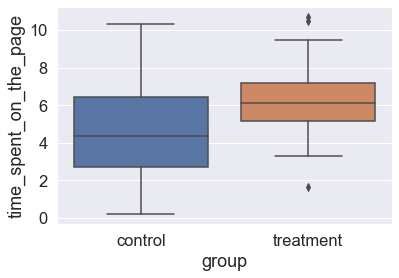

In [13]:
#Plot the graph of the time spent on the page categorized by group of control and treatment
sns.boxplot(x = 'group', y ='time_spent_on_the_page', data = df);

* The time spent of the control group has a wider range compared to the treatment group. 
* However, the average time spent for the control group lies a bit lower than the treatment gourp.

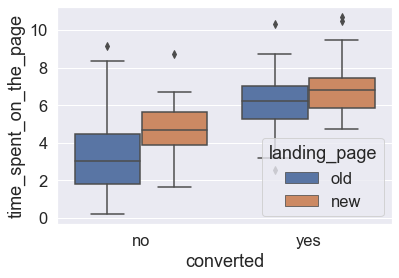

In [14]:
sns.boxplot(x = 'converted', y ='time_spent_on_the_page', data = df, hue='landing_page');

* In general, people who were converted seem spending more time whether they land on new or old page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

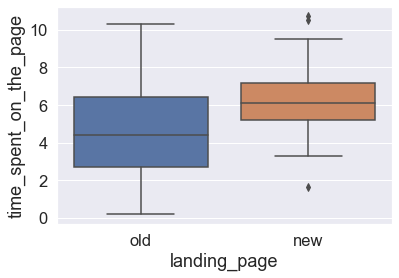

In [15]:
# The boxplot shows the graph of old and new landing_page
sns.boxplot(x = 'landing_page', y ='time_spent_on_the_page', data = df);

* The graph shows it seems like in average, the users spend more time opn the new landing page than the existing landing page.
* Let's do the test to see whether it's true statistically.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean of time spent on the new landing page and the existing page respectively.

We want to test whether users spend more time on the new landing page than the existing landing page.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

* The `2-sample ind.t-test` will be used to compute the test statistic and p-value.

### Step 3: Decide the significance level

* Significant level 5%

### Step 4: Collect and prepare data

In [16]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [17]:
print('The mean of time spent on new panding page is '+ 
      str(round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(),2)))
print('The mean of time spent on existing panding page is '+ 
      str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of time spent on existing panding page is '+ 
      str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].std(),2)))
print('The standard deviation of time spent on existing panding page is '+ 
      str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].std(),2)))

The mean of time spent on new panding page is 6.22
The mean of time spent on existing panding page is 4.53
The standard deviation of time spent on existing panding page is 2.58
The standard deviation of time spent on existing panding page is 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

So we can use two sample T-test for this problem.


### Step 5: Calculate the p-value

In [18]:
# import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df[df['landing_page'] == 'new']['time_spent_on_the_page'], 
                df[df['landing_page'] == 'old']['time_spent_on_the_page'], equal_var = True, alternative = 'greater')

print('The p-value is ', p_value)

The p-value is  0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

* As the p-value is much less than the level of significance (0.05), the null hypothesis can be rejected. 


### Step 7:  Draw inference

* Thus, it may be concluded that there is enough statistical evidence to conclude that there 
is an increase in the time spent on the new landing page compared to the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [19]:
# Pull out the data
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [20]:
# Create a crosstab of landing_page and converted
a = pd.crosstab(df['landing_page'], df['converted'], margins =True)
a

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


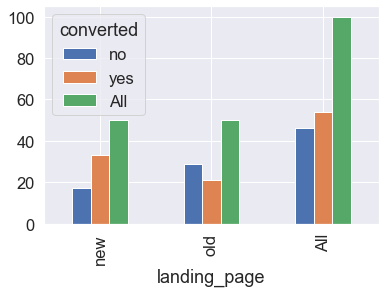

In [21]:
# Plot the bar graph compared number of people converted between new and old page
a.plot(kind='bar')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the proportions of the conversion rate for the new page and old page respectively.

We need to test the null hypothesis

>$H_0:p_1 <=p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Let's test whether the T-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either converted or not-converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 2: Select Appropriate test

This test we use the `proportions_ztest()`  to compare two proportions.

### Step 3: Decide the significance level

* significant level is 5%

### Step 4: Calculate the p-value

In [22]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 5: Compare the p-value with $\alpha$

* The p-value is less than the significant (0.05).

### Step 6:  Draw inference

* As the p-value is less than the significance level 0.05, we can reject the null hypothesis. 
* Thus, we have enough statistical significance to conclude that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Collect and prepare data & Perform Visual Analysis 

In [23]:
# Pull out the dat
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [24]:
#Create the crosstab table of language preferred and converted column
b = pd.crosstab(df['language_preferred'], df['converted'])
b

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


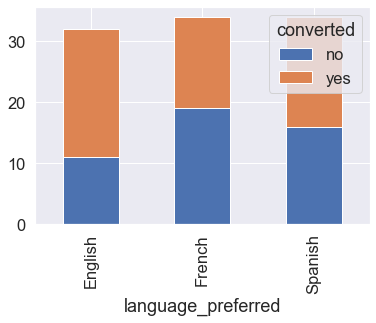

In [25]:
# Visual analysis
b.plot(kind='bar', stacked=True)
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ The converted status is independent from  preferred language.

against the alternate hypothesis

>$H_a:$ The converted status is related to preferred language.

### Step 2: Select Appropriate test

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


The [`chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function of Scipy will be used to compute the test statistic and p-value.

### Step 3: Decide the significance level

Significance level of 5%

### Step 4: Calculate the p-value

In [26]:
# import the required function
from scipy.stats import chi2_contingency

#find the p-value
chi, p_value, dof, expected = chi2_contingency(b)

print('The p-value is ', p_value)

The p-value is  0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

* The p-value is much greater than the significant level
* So we cannot reject the null hypothesis.

### Step 7:  Draw inference

* We do not have enough statistical significance to conclude that conversion and preferred language are related.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [27]:
# dataset of new landing page
df1 = df[df['landing_page'] == 'new']
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [28]:
df1.shape

(50, 6)

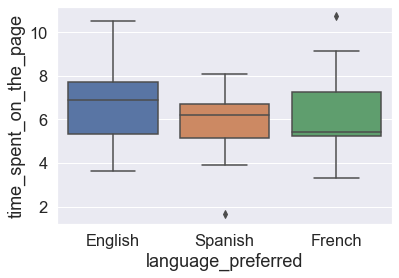

In [29]:
# Plot the graph comparing the time spent on new page in terms of language preferred
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data=df1);

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent for English, Spanish, French on new page.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean is different from the rest.


### Step 2: Select Appropriate test

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

Shapiro-Wilk’s test
We will test the null hypothesis

𝐻0: `time_spent_on_the_page` follows a normal distribution against

against the alternative hypothesis

𝐻𝑎: `time_spent_on_the_page` does not follow a normal distribution

The [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [30]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df1['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [31]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df1['time_spent_on_the_page'][df1['language_preferred']=="English"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="French"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

### Step 3: Decide the significance level

* significant level is 5%

### Step 4: Collect and prepare data

In [32]:
df1.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [33]:
#import the required function
from scipy.stats import f_oneway

# perform one-way ANOVA test
test_stat, p_value = f_oneway(
    df1.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
         df1.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
         df1.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])

print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

* p-value is much larger than significant level (0.05).
* Thus, we fail to reject the null hypothesis.

### Step 7:  Draw inference

* We do not have enough statistical significant to conclude that the time spent on the 
new page different for the different language users.

## Conclusion and Business Recommendations

* There is enough statistical evidence to conclude that there is an increase in the time spent on the new landing page compared to the old page. So the new landing page is more attractive to people. The business should keep improving and working on its content.
* We have enough statistical significance to conclude that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page. Again people get converted on the new land greater which means new land tends to be more attractive to people and company should keep working on the new landing page.
* We do not have enough statistical significance to conclude that conversion and preferred language are related. So the company should not base on retionship between preferred language and conversion rate to make decision.
* We do not have enough statistical significant to conclude that the time spent on the new page different for the different language users. So the company should collect more data to work on this question to get more accurate results. Or do not make any decision based on specific customers based on their language.

___